# 2110203 COMP ENG MATH II (CEDT) -- Stats Homework I

**Instructions**:
- Only ASSIGNMENT 1 and 2 will be graded. The rest are for your practise.
- Submit as PDF file. You can create PDF file using File -> Print from the Google Colab menu.


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import math, random

## Sampling

Sampling is a process that is very important for writing simulations. In this section, you will try to sample from some common distributions.


In [43]:
from scipy.stats import norm, bernoulli, binom, uniform, geom, expon

# Sample from Uniform(a, b)
def sample_uniform(sample_size, a, b):
  # [YOUR CODE HERE]  
  return uniform.rvs(a,b-a,size=sample_size)

def sample_normal(sample_size, mu, sigma):
  # [YOUR CODE HERE]  
  return norm.rvs(mu,sigma,size=sample_size)

def sample_bernoulli(sample_size, p):
  # [YOUR CODE HERE]
  return bernoulli.rvs(p,size=sample_size)

def sample_binomial(sample_size, n, p):
  # [YOUR CODE HERE]
  return binom.rvs(n,p,size=sample_size)

def sample_geometric(sample_size, p):
  # [YOUR CODE HERE]
  return geom.rvs(p,size=sample_size)

def sample_exponential(sample_size, l):
  # [YOUR CODE HERE]
  return expon.rvs(scale=1/l,size=sample_size)

# ASSIGNMENT 1
# sample from pdf f(x)=x/50, 0<=x<=10
def sample_increasing(sample_size):
  # [YOUR CODE HERE]
  x = uniform.rvs(0,10,size=sample_size)
  x = np.sqrt(x*100)
  return x

In [44]:
def plot_histogram(data):
  plt.hist(data)

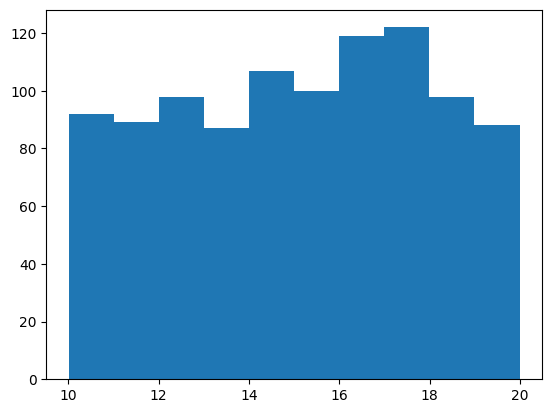

In [45]:
plot_histogram(sample_uniform(1000, 10, 20))

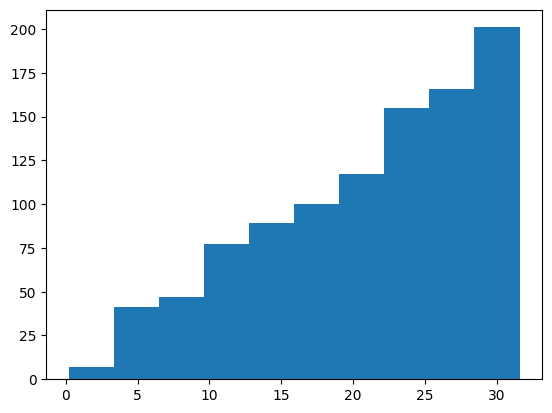

In [46]:
plot_histogram(sample_increasing(1000))

### Problem 0

Try playing with the sample size and see how the histogram change with each run. Check if the result match what you think. Explain in detail.

## Maximum Likelihood Estimation

### Problem 1

Machines in Hamtaro’s factory have their lifetime modelled by exponential distribution with an unknown parameter. Hamtaro found out that his machines failed after $x_1, x_2, ..., x_n$ years. Estimate the unknown parameter.

In [47]:
machine_failed_time = [2, 3, 1, 3, 4]   # In class example
# machine_failed_time = sample_exponential(5, 0.3)  # Sampled from exponential distribution

def prob1_mle(X):
  return len(X)/np.sum(X)

print('The estimated parameter is: {}'.format(prob1_mle(machine_failed_time)))

The estimated parameter is: 0.38461538461538464


### Problem 2

The number of attempts for the STATS COMP ENG class before passing following a Geometric distribution with unknown parameter. $n$ students failed $x_1, x_2, ..., x_n$ times before passing. Find the MLE of the parameter.

In [48]:
X = [0, 0, 2]
# X = sample_geometric(10, 0.9)   # Sample from actual geometric distribution

def prob2_mle(X):
  # [YOUR CODE HERE]
  n = len(X)
  sum_x = sum(X)
  mle = n/(sum_x+n)
  
  return mle

print('The MLE is {}'.format(prob2_mle(X)))

The MLE is 0.6


### Problem 3

Suppose our data $x_1, x_2, ..., x_n$ is randomly drawn from uniform distribution $U(a,b)$. Find MLE of $a$ and $b$.

In [49]:
X = sample_uniform(100, 60, 78)

def prob3_mle(X):
  # [YOUR CODE HERE]
  a = np.min(X)
  b = np.max(X)
  return a, b

a, b = prob3_mle(X)
print('The MLE is ({}, {})'.format(a, b))

The MLE is (60.218400609072596, 77.84282105398299)


## Maximum A Posteriori Estimation

### Problem 4

Toss an unknown coin $n$ times. The result has a head $h$ times. Koshi-kun told us that there are three possible coins:

- Coin A – P[H] = $c_a$
- Coin B – P[H] = $c_b$
- Coin C – P[H] = $c_c$

Koshi-kun also told us A, B, C has probability of being the coin with probability $p_a, p_b, p_c$, respectively. Find the MAP estimate.

In [50]:
num_coin = 3
coin_head_prob = [0.8, 0.5, 0.4]
coin_select_prob = [0.4, 0.4, 0.2]
n = 5
h = 2

In [51]:
def coin_posterior(n, h, head_prob, select_prob):
  # ASSIGNMENT 2
  # [YOUR CODE HERE]
  return math.comb(n,h) * pow(head_prob,h) * pow(1-head_prob,n-h) * select_prob

p_map = 0
p_map_val = 0
for i in range(num_coin):
  posterior = coin_posterior(n, h, coin_head_prob[i], coin_select_prob[i])
  print('Coint {} has posterior of {}'.format(i, posterior))
  if posterior > p_map_val:
    p_map_val = posterior
    p_map = coin_head_prob[i]

print()
print('The estimated parameter is {}'.format(p_map))

Coint 0 has posterior of 0.02047999999999999
Coint 1 has posterior of 0.125
Coint 2 has posterior of 0.06912

The estimated parameter is 0.5


### Problem 5

From https://xkcd.com/1132/. Assume that chance of the sun actually explode is $10^{-6}$. What are the chance that the machine said the sun exploded when it actually isn't?

In [52]:
sun_prior = 1e-6
lie_prob = 1/36

def check_sun():
  # [YOUR CODE HERE]
  dice1 = random.randint(1,6)
  dice2 = random.randint(1,6)

  if(dice1 == 6 and dice2 == 6): return True
  else: return np.random.rand() < sun_prior

count_exploded = 0
ask_times = 1000000
for i in range(ask_times):
  if check_sun():
    count_exploded += 1

print('The sun exploded {} times.'.format(count_exploded))
print('Explode rate: {}'.format(count_exploded / ask_times))

The sun exploded 27978 times.
Explode rate: 0.027978


### Problem 6

Go back to problem 2-5, and try to play with input size and parameter. Observe the change in result. Explain in detail.